# **Light weight Neural Model(LSTM AND GRU)**

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data = pd.read_csv('/content/balanced_ai_human_prompts.csv')
data.head()

,text,generated
0,"Machine learning, a subset of artificial intel...",1
1,"A decision tree, a prominent machine learning ...",1
2,"Education, a cornerstone of societal progress,...",1
3,"Computers, the backbone of modern technology, ...",1
4,"Chess, a timeless game of strategy and intelle...",1


Here we are plotting the confusion matrix and tokenizing the data with the tokenizer function from keras

In [3]:
import seaborn as sn

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

In [4]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>') #means when you see a new word in testing mark it as OOV.
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text']) #tells the tokenizer to follow the sequence when tokenization

In [5]:
maxlen = 500
padded_sequences = pad_sequences(sequences, maxlen=maxlen, truncating='post')

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, data['generated'], test_size=0.2, random_state=42)

RNN model with LSTM AND GRU Layer and compiling it

In [7]:
# Build the RNN model with LSTM and GRU layer
model = models.Sequential([
    layers.Embedding(input_dim=10000, output_dim=64, input_length=maxlen),

    layers.LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
    layers.GRU(32, dropout=0.2, recurrent_dropout=0.2),

    layers.Dense(32, activation='relu'),

    layers.Dropout(0.5),

    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5


KeyboardInterrupt: 

Good accuracy

In [ ]:
#  Evaluating the Model:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 554ms/step - accuracy: 0.9906 - loss: 0.0595
Test Loss: 0.049102719873189926
Test Accuracy: 0.9927272796630859


We can see that our light weight model has a similar understanding to our data like the logistic regression for postive negative and bag of words

In [ ]:

# Making Predictions:
sample_reviews = [
    "i like the machine learning course",
    "hi my name is abdullah and today i will be talking about cars"
]
tokenized_reviews = tokenizer.texts_to_sequences(sample_reviews)
padded_reviews = pad_sequences(tokenized_reviews, maxlen=maxlen, truncating='post')

predictions = model.predict(padded_reviews)

for i, review in enumerate(sample_reviews):
    sentiment = "positive" if predictions[i][0] > 0.5 else "negative"
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {sentiment}\n")



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Review: i like the machine learning course
Predicted Sentiment: positive

Review: hi my name is abdullah and today i will be talking about cars
Predicted Sentiment: positive



In [ ]:
y_pred = model.predict(x_test)
y_pred

18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 547ms/step


array([[0.00729591],
       [0.00666461],
       [0.9780547 ],
       [0.9775514 ],
       [0.00763677],
       [0.00645811],
       [0.97820467],
       [0.97778875],
       [0.00706606],
       [0.00631045],
       [0.00714486],
       [0.97791004],
       [0.00859865],
       [0.00819811],
       [0.00618575],
       [0.97810715],
       [0.00687618],
       [0.00707755],
       [0.00678328],
       [0.00670625],
       [0.00858075],
       [0.00992066],
       [0.9782929 ],
       [0.9781104 ],
       [0.00715706],
       [0.0064311 ],
       [0.977996  ],
       [0.97817683],
       [0.00627932],
       [0.00649184],
       [0.97813046],
       [0.9781633 ],
       [0.00542698],
       [0.00753905],
       [0.97826266],
       [0.97832924],
       [0.00871138],
       [0.9780295 ],
       [0.9780561 ],
       [0.00687183],
       [0.9781738 ],
       [0.97842914],
       [0.00738999],
       [0.00669182],
       [0.97828764],
       [0.00818212],
       [0.00676915],
       [0.006

In [ ]:
y_pred =pd.DataFrame(y_pred, columns=['values'])
y_pred

,values
0,0.007296
1,0.006665
2,0.978055
3,0.977551
4,0.007637
...,...
545,0.007334
546,0.008779
547,0.006589
548,0.007004


In [ ]:
y_pred = (y_pred> 0.5).astype(int)
print(y_pred)

     values
0         0
1         0
2         1
3         1
4         0
..      ...
545       0
546       0
547       0
548       0
549       1

[550 rows x 1 columns]


Almost perfect classification

<module 'seaborn' from '/usr/local/lib/python3.12/dist-packages/seaborn/__init__.py'>

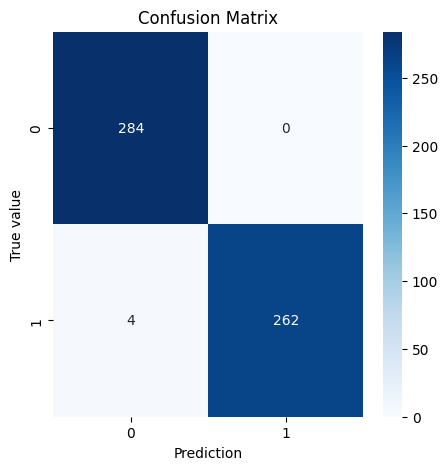

In [ ]:
plot_confusion(confusion_matrix(y_test, y_pred))

In [ ]:
y_pred1 = model.predict(x_test)
y_pred1

18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 543ms/step


array([[0.00729591],
       [0.00666461],
       [0.9780547 ],
       [0.9775514 ],
       [0.00763677],
       [0.00645811],
       [0.97820467],
       [0.97778875],
       [0.00706606],
       [0.00631045],
       [0.00714486],
       [0.97791004],
       [0.00859865],
       [0.00819811],
       [0.00618575],
       [0.97810715],
       [0.00687618],
       [0.00707755],
       [0.00678328],
       [0.00670625],
       [0.00858075],
       [0.00992066],
       [0.9782929 ],
       [0.9781104 ],
       [0.00715706],
       [0.0064311 ],
       [0.977996  ],
       [0.97817683],
       [0.00627932],
       [0.00649184],
       [0.97813046],
       [0.9781633 ],
       [0.00542698],
       [0.00753905],
       [0.97826266],
       [0.97832924],
       [0.00871138],
       [0.9780295 ],
       [0.9780561 ],
       [0.00687183],
       [0.9781738 ],
       [0.97842914],
       [0.00738999],
       [0.00669182],
       [0.97828764],
       [0.00818212],
       [0.00676915],
       [0.006

In [ ]:
import numpy as np
y_pred1 = np.ravel(y_pred1)

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)

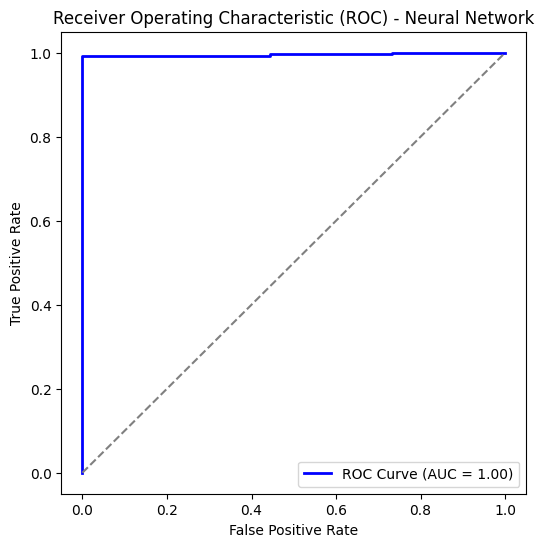

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Neural Network')
plt.legend(loc="lower right")
plt.show()

# **BERT**

Here we install the libaries we need for the BERT model

In [8]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.1 MB/s eta 0:00:00


In [9]:
from datasets import DatasetDict, Dataset
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer, AutoTokenizer
import numpy as np
import evaluate
from transformers import DataCollatorWithPadding

Then we set the model path, and assign its tokenizer with the labels, lastly we set the model itself

In [10]:
model_path = "google-bert/bert-base-uncased"
model_tokenizer = AutoTokenizer.from_pretrained(model_path)

id2label = {0: "human", 1: "ai"}
label2id = {"human": 0, "ai": 1}

model = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=2, id2label=id2label, label2id=label2id)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Now we are freezing all the model based parameters since we are going to give it new ones and we dont want the model to lose its pretrained knowledge when passing a new dataset, and undfreeze the based model pooling layers allows the model to adjust how it summarizes the input for your specific task

In [11]:
#freezing all based model parameters
for name, param in model.base_model.named_parameters():
  param.requires_grad = False
#unfreeze based model pooling layers
for name, param in model.base_model.named_parameters():
  if "pooler" in name:
    param.requires_grad = True

Pre-processing using the model's tokenizer:

In [12]:
def preprocess_function(examples):
  return model_tokenizer(examples["text"], truncation=True)

here we are converting our dataset to a hugging face dataset so we can have faster computation, easily apply the tokenization method, to work intergrate directly with the trainer api and etc.

In [13]:
from datasets import Dataset

# Convert pandas DataFrame to Hugging Face Dataset
hf_dataset = Dataset.from_pandas(data)

# Apply the preprocessing function (tokenizer) to the dataset
tokenized_hf_dataset = hf_dataset.map(preprocess_function, batched=True)

# Rename the 'generated' column to 'labels' as expected by the Hugging Face model
tokenized_hf_dataset = tokenized_hf_dataset.rename_column("generated", "labels")

# Remove the original 'text' column as it's no longer needed after tokenization
tokenized_hf_dataset = tokenized_hf_dataset.remove_columns(["text"])

# Split the dataset into training and testing sets, creating a DatasetDict
tokenized_data = tokenized_hf_dataset.train_test_split(test_size=0.2, seed=42)

Map:   0%|          | 0/2750 [00:00<?, ? examples/s]

Here is how our tokenized dataset looks like using the BERT tokenizer

In [14]:
tokenized_data

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2200
    })
    test: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 550
    })
})

In [15]:
train_dataset = tokenized_data["train"]
test_dataset = tokenized_data["test"]

Here we use the data collator because it has Less padding ,Faster training
, Less GPU waste and it does all this in the model training process. Its fast than normal padding since it does set each text to specific maximum length instead it pads each batch to the longest sequence in that batch.

In [16]:
data_collator = DataCollatorWithPadding(tokenizer=model_tokenizer)

Here we are computing the metrics for accuracy

In [23]:
accuracy_metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy_metric.compute(predictions=predictions, references=labels)


Here we are assigning the batch size, number of epochs, the output directory, and loading the best model at the end.

In [24]:
batch_size= 80
num_epochs = 3
training_args = TrainingArguments(
    output_dir="bert-phishing-classifier_teacher",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    logging_strategy="epoch",
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    report_to="none"
)

here were assgning the trainer's parameters

In [25]:
trainer = Trainer (
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

Compiling the model:

In [26]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.054000,0.033716,0.994545
2,0.031400,0.025535,0.996364
3,0.024300,0.023814,0.996364


TrainOutput(global_step=84, training_loss=0.03655849326224554, metrics={'train_runtime': 261.5817, 'train_samples_per_second': 25.231, 'train_steps_per_second': 0.321, 'total_flos': 1736532965376000.0, 'train_loss': 0.03655849326224554, 'epoch': 3.0})

In [42]:
label_map = tokenized_data["train"].features["labels"]

In [43]:
import torch
def classify(text):
  inputs = model_tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=256)
  inputs = {k:v.to(model.device) for k,v in inputs.items()}
  with torch.no_grad():
    outputs = model(**inputs)
  predicted_class_id = outputs.logits.argmax(dim=-1).item()
  return id2label[predicted_class_id]

It also has a similar understading of the data to the previous model except the TDF-IDF, perhaps this has to do with training because i did a different compilation and it classified the second text as human.

In [44]:
texta ="i like the machine learning course"
classify(texta)

'ai'

In [45]:
textb ="hi my name is abdullah and today i will be talking about cars"
classify(textb)

'ai'

In [ ]:
probab=result = arr[:, [0]]


here we are using the test dataset to find the predictions, and we are using the logits(how model classified each row for each test example) and the labels(the actual values)

In [31]:
predictions = trainer.predict(test_dataset)
logits = predictions.predictions
labels = predictions.label_ids

In [32]:
labels

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,

In [33]:
logits

array([[ 3.2877645, -3.3309968],
       [ 2.9263394, -3.1703217],
       [ 2.3481765, -2.5465097],
       ...,
       [-2.6281288,  2.9971378],
       [ 2.5318804, -2.5597963],
       [-2.6048865,  2.9778342]], dtype=float32)

Here we did some array manuplation to have the label and the logits have similar values(int type) so we can compare how well the model classified each example

In [34]:
probab = logits[:, [0]]
probab

array([[ 3.2877645 ],
       [ 2.9263394 ],
       [ 2.3481765 ],
       [-2.718011  ],
       [ 2.4421558 ],
       [-2.5498028 ],
       [ 2.4915924 ],
       [-2.644838  ],
       [-2.9404993 ],
       [-2.7180986 ],
       [-2.5477827 ],
       [-2.380939  ],
       [ 2.4712534 ],
       [-2.8742821 ],
       [-2.501203  ],
       [ 2.6760418 ],
       [ 2.4278107 ],
       [ 2.4170175 ],
       [ 3.211517  ],
       [-2.520451  ],
       [-2.740575  ],
       [ 2.5252523 ],
       [ 2.5338593 ],
       [-2.6385155 ],
       [ 2.9589703 ],
       [ 1.7183028 ],
       [-2.6501296 ],
       [ 2.007069  ],
       [-2.387587  ],
       [ 2.429294  ],
       [ 2.619191  ],
       [ 2.0905852 ],
       [-0.48537132],
       [ 2.4426064 ],
       [ 2.304841  ],
       [-0.22287871],
       [-2.4321291 ],
       [-2.5888014 ],
       [ 1.8183638 ],
       [-2.6757164 ],
       [-2.7922258 ],
       [-3.1573346 ],
       [-2.697664  ],
       [-2.6133611 ],
       [ 1.7922196 ],
       [-2

In [35]:
result = np.where(probab < 0, 1, 0)
result

array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
    

In [36]:
labels

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,

finally our model ROC AUC indicates it nearly perfect which means the classifiation isnt random.

In [37]:
from sklearn.metrics import roc_auc_score
import numpy as np

result_flat = result.flatten()
roc_auc_binary = roc_auc_score(labels, result_flat)
print(f"ROC AUC using binary predictions: {roc_auc_binary:.4f}")

ROC AUC using binary predictions: 0.9964


The confusion matrix also tells us the model is good.

<module 'seaborn' from '/usr/local/lib/python3.12/dist-packages/seaborn/__init__.py'>

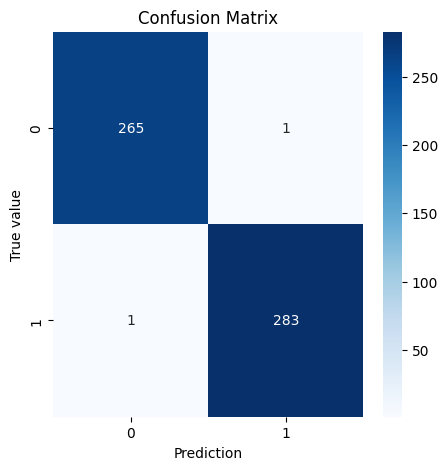

In [46]:
plot_confusion(confusion_matrix(labels, result))